In [1]:
import sys
sys.path.append('../lib')
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from lowess_regression import LowessModel

In [2]:
np.random.seed(56) # Comment this line to get new result on every run
n = 100
t = np.sort(np.random.uniform(0, 3 * np.pi, size=n))
# Original sine signal
signal = np.sin(t)
# Distort the signal by introducing some additive noise
#noise = 'white'
noise = 'gaussian'
signal += np.random.uniform(size=len(t)) if noise == 'white' else np.random.normal(size=len(t))

In [3]:
# Set model's params
kernel_param = 0.15
n_std = 1.0

In [4]:
# Create and apply our model to distorted signal
lf = LowessModel(kernel_param, n_std)
signal_smoothed_our = lf.smooth(t, signal)

In [5]:
# Create and apply statsmodels' lowess model to distorted signal
signal_smoothed_sm = sm.nonparametric.lowess(exog=t, endog=signal, frac=kernel_param, it=0, return_sorted=False)

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_147981/301197211.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.fill_between(t, signal_smoothed_our[1], signal_smoothed_our[2], color='C1', alpha=0.15, label=f'CI for our: $\pm${n_std}$\sigma$')
/tmp/ipykernel_147981/301197211.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(t, signal_smoothed_our[1], signal_smoothed_our[2], color='C1', alpha=0.15, label=f'CI for our: $\pm${n_std}$\sigma$')


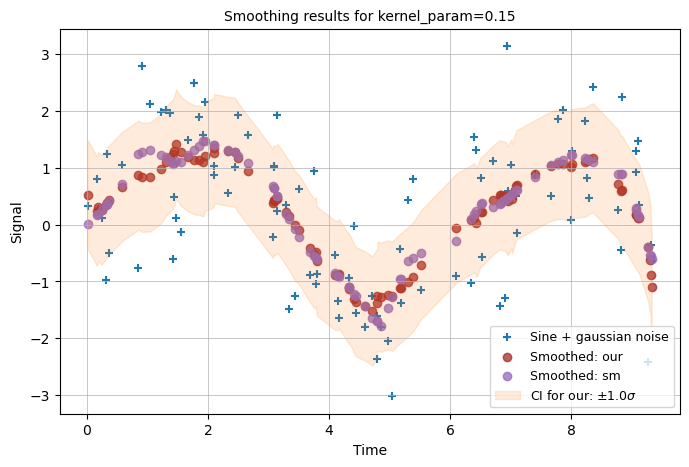

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(t, signal, marker='+', color='C0', label=f'Sine + {noise} noise')
plt.scatter(t, signal_smoothed_our[0], color='brown', alpha=0.75, label='Smoothed: our')
plt.scatter(t, signal_smoothed_sm, color='C4', alpha=0.75, label='Smoothed: sm')
plt.fill_between(t, signal_smoothed_our[1], signal_smoothed_our[2], color='C1', alpha=0.15, label=f'CI for our: $\pm${n_std}$\sigma$')
plt.title(f'Smoothing results for {kernel_param=}', size=10)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(loc='lower right', prop={'size': 9})
plt.grid(lw=0.5);